
# SVM Algorithm on Steam Review Datasets

##  Import libraries



In [1]:
%pip install numpy
%pip install pandas
%pip install tqdm
%pip install numpy
%pip install nltk
%pip install regex
%pip install contractions
%pip install nltk
%pip install sklearn
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

  Using cached sklearn-0.0.post4.tar.gz (3.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [24 lines of output]
      Traceback (most recent call last):
        File "c:\Users\MSI PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
          main()
        File "c:\Users\MSI PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
          json_out['return_val'] = hook(**hook_input['kwargs'])
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "c:\Users\MSI PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 118, in get_requires_for_build_wheel
          return hook(config_settings)
                 ^^^^^^^^^^^^^^^^^^^^^
        File "C:\Users\MSI PC\AppData\Local\Temp\pip-build-env-eu5pw

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np 
import pandas as pd 
import os
from tqdm import tqdm
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
import re
import contractions
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
from sklearn.metrics import classification_report
import seaborn as sns
%matplotlib inline

[nltk_data] Downloading package stopwords to C:\Users\MSI
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\MSI
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\MSI PC\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to C:\Users\MSI
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
import warnings

warnings.filterwarnings('ignore')

## Import dataset

In [4]:
df = pd.read_csv('steamFilter.csv')

## Exploratory data analysis

In [5]:
# view dimensions of dataset

df.shape

(100000, 10)

In [6]:
# let's preview the dataset

df.head()

,Unnamed: 0,date_posted,funny,helpful,hour_played,is_early_access_review,recommendation,review,title,id
0,0,2019-02-10,2,4,578,False,1,&gt Played as German Reich&gt Declare war on B...,Expansion - Hearts of Iron IV: Man the Guns,0
1,1,2019-02-10,0,0,184,False,1,yes.,Expansion - Hearts of Iron IV: Man the Guns,1
2,2,2019-02-07,0,0,892,False,1,Very good game although a bit overpriced in my...,Expansion - Hearts of Iron IV: Man the Guns,2
3,3,2018-06-14,126,1086,676,False,1,Out of all the reviews I wrote This one is pro...,Dead by Daylight,3
4,4,2017-06-20,85,2139,612,False,1,Disclaimer I survivor main. I play games for f...,Dead by Daylight,4


In [7]:
# view the column names of the dataframe

col_names = df.columns

col_names

Index(['Unnamed: 0', 'date_posted', 'funny', 'helpful', 'hour_played',
       'is_early_access_review', 'recommendation', 'review', 'title', 'id'],
      dtype='object')

In [8]:
# remove leading spaces from column names

df.columns = df.columns.str.strip()

In [9]:
# view column names again

df.columns

Index(['Unnamed: 0', 'date_posted', 'funny', 'helpful', 'hour_played',
       'is_early_access_review', 'recommendation', 'review', 'title', 'id'],
      dtype='object')

In [10]:
# check distribution of target_class column

df['recommendation'].value_counts()

1    88208
0    11792
Name: recommendation, dtype: int64

In [11]:
# view the percentage distribution of target_class column

df['recommendation'].value_counts()/np.double(len(df))

1    0.88208
0    0.11792
Name: recommendation, dtype: float64

### Explore missing values in variables

In [12]:
# view summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Unnamed: 0              100000 non-null  int64 
 1   date_posted             100000 non-null  object
 2   funny                   100000 non-null  int64 
 3   helpful                 100000 non-null  int64 
 4   hour_played             100000 non-null  int64 
 5   is_early_access_review  100000 non-null  bool  
 6   recommendation          100000 non-null  int64 
 7   review                  100000 non-null  object
 8   title                   100000 non-null  object
 9   id                      100000 non-null  int64 
dtypes: bool(1), int64(6), object(3)
memory usage: 7.0+ MB


In [13]:
# check for missing values in variables

df.isnull().sum()

Unnamed: 0                0
date_posted               0
funny                     0
helpful                   0
hour_played               0
is_early_access_review    0
recommendation            0
review                    0
title                     0
id                        0
dtype: int64

### Outliers in numerical variables

In [14]:
# view summary statistics in numerical variables

round(df.describe(),2)

,Unnamed: 0,funny,helpful,hour_played,recommendation,id
count,100000.00,1.000000e+05,100000.00,100000.00,100000.00,100000.00
mean,49999.50,3.006481e+05,1.39,385.83,0.88,49999.50
std,28867.66,3.593320e+07,61.86,543.21,0.32,28867.66
min,0.00,0.000000e+00,0.00,10.00,0.00,0.00
25%,24999.75,0.000000e+00,0.00,63.00,1.00,24999.75
50%,49999.50,0.000000e+00,0.00,187.00,1.00,49999.50
75%,74999.25,0.000000e+00,0.00,491.00,1.00,74999.25
max,99999.00,4.294967e+09,12273.00,12709.00,1.00,99999.00


## Using Cleaned-STEAM-Reviews as dataset

In [15]:
experimentData = pd.read_csv('steamFilter.csv')

In [16]:
def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.VERB

In [17]:
def decontracted(phrase):
    # Specific
    #phrase = re.sub(r"won\'t", "will not", phrase)
    #phrase = re.sub(r"can\'t", "can not", phrase)

    # General
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " be", phrase)
    phrase = re.sub(r"\'s", " be", phrase)
    phrase = re.sub(r"\'d", " will", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " be", phrase)
    return phrase

In [18]:
stop_words = set(stopwords.words('english'))
def cleanReviews (df):
    reviews_tokens = []
    for review in tqdm(df['review']):
        review_text = review
        #expanded_words = []    
        #for word in review_text.split():
          # using contractions.fix to expand the shotened words
          #expanded_words.append(contractions.fix(word))   

        #review_text = ' '.join(expanded_words)
        
        #pattern = r'[0-9]'
        pattern = r'[?.\-,;."|°¬&¿?=\[\]{}}`_:¡!()^]'

        review_text = re.sub(pattern, '', review_text)
        
        words = word_tokenize(review_text.lower())
        words = [w for w in words if not w in stop_words]
        tagged = nltk.pos_tag(words)
        tokens_lemma = [lemmatizer.lemmatize(token[0], get_wordnet_pos(token[1])) for token in tagged]
        token_index = 0
        for token in tokens_lemma:
            tokens_lemma[token_index] = decontracted(token)
            token_index += 1
        #tokens_fixed = [contractions.fix(token)
        #            for token in words if contractions.fix(token) != 's']
        #lemma_words = [lemmatizer.lemmatize(i) for i in words]
        
        reviews_tokens.append(tokens_lemma)
        
    return reviews_tokens

### Check dataset with Token-To-String

In [19]:
experimentReviews = cleanReviews(experimentData)

100%|██████████| 100000/100000 [04:36<00:00, 361.15it/s]


In [20]:
print(experimentReviews[3])

['review', 'write', 'one', 'probably', 'serious', 'one', 'write', 'starter', 'community', 'game', 'suck', 'like', 'every', 'online', 'game', ' not', 'wan', 'na', 'talk', ' be', 'jerk', 'wan', 'na', 'say', 'suck', 'camp', 'blah', 'blah', 'blah', 'rare', 'get', 'nice', 'compliment', 'people', 'gamebut', ' not', 'talk', 'community', 'either', 'unlike', 'online', 'game', 'one', ' not', 'mic', 'system', ' not', 'worry', 'hear', 'twelve', 'year', 'old', 'cry', 'baby', 'rag', 'nothing', 'time', 'talk', 'people', 'game', 'begin', 'match', 'start', 'survivor', 'end', 'match', 'killer', 'survivor', 'end', 'chat', 'one', 'killer', 'talk', 'everyone', 'match', 'though', 'mostly', 'say', 'gg', 'good', 'gameas', 'survivor', 'basically', 'play', 'every', 'man', 'sneaky', 'say', 'screw', 'player', 'try', 'good', 'team', 'mate', 'rescue', 'get', 'hook', 'someone', 'jerk', 'chat', 'match', 'know', 'save', 'get', 'hook', 'mostly', 'play', 'killer', 'find', 'fun', 'play', 'survivor', 'someone', 'get', 'ta

In [21]:
def tokensToStr(token_List):
    reviewsProcessed = []
    for review in token_List:
        r = " ".join(map(str, review))
        reviewsProcessed.append(r)
    return reviewsProcessed

In [22]:
reviewsProcessed = tokensToStr(experimentReviews)

In [23]:
print(reviewsProcessed[3])

review write one probably serious one write starter community game suck like every online game  not wan na talk  be jerk wan na say suck camp blah blah blah rare get nice compliment people gamebut  not talk community either unlike online game one  not mic system  not worry hear twelve year old cry baby rag nothing time talk people game begin match start survivor end match killer survivor end chat one killer talk everyone match though mostly say gg good gameas survivor basically play every man sneaky say screw player try good team mate rescue get hook someone jerk chat match know save get hook mostly play killer find fun play survivor someone get ta play killer hear people enjoy play survivor probably becuase survivor feel like horror game get team mate killer  be yourselfbut  be really try say game really great even though community suck ignore community get someone rag end say gg leave see  not make argue waste time might make even mad even get last word aka gg give game 8/10 wonder a

## Declare feature vector and target variable

In [24]:
y = experimentData['recommendation']

## Split data into separate training and test set

In [25]:
X_train, X_test, y_train, y_test = train_test_split(reviewsProcessed, y, test_size = 0.2, random_state=0)

## 11. Feature Scaling

In [26]:
cv = CountVectorizer()
X_trainCV = cv.fit_transform(X_train)
X_testCV = cv.transform(X_test)

In [27]:
# check the shape of X_train and X_test

X_trainCV.shape, X_testCV.shape

((80000, 83181), (20000, 83181))

## Run SVM To Produce Steam Review Model

### Hyperparameter Optimization using GridSearch CV

In [29]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score

# instantiate classifier with rbf kernel and C=100
svc=SVC(C=100.0) 


# fit classifier to training set
svc.fit(X_trainCV,y_train)


# make predictions on test set
y_pred=svc.predict(X_testCV)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with rbf kernel and C=100.0 : 0.9091


### Compare the train-set and test-set accuracy


Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [30]:
y_pred =svc.predict(X_trainCV)

y_pred

KeyboardInterrupt: 

In [31]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred)))

### Check for overfitting and underfitting

In [32]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(svc.score(X_trainCV, y_train)))

print('Test set score: {:.4f}'.format(svc.score(X_testCV, y_test)))

KeyboardInterrupt: 

## Confusion matrix


A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.


Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-


**True Positives (TP)** – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.


**True Negatives (TN)** – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.


**False Positives (FP)** – False Positives occur when we predict an observation belongs to a    certain class but the observation actually does not belong to that class. This type of error is called **Type I error.**



**False Negatives (FN)** – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called **Type II error.**



These four outcomes are summarized in a confusion matrix given below.


In [33]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

In [34]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## Classification metrices

### Classification Report


**Classification report** is another way to evaluate the classification model performance. It displays the  **precision**, **recall**, **f1** and **support** scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [35]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.50      0.56      2376
           1       0.93      0.96      0.95     17624

    accuracy                           0.91     20000
   macro avg       0.79      0.73      0.76     20000
weighted avg       0.90      0.91      0.90     20000



### Classification accuracy

In [36]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [37]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))


Classification accuracy : 0.9091


### Classification error

In [38]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))


Classification error : 0.0910


### Precision


**Precision** can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP). 


So, **Precision** identifies the proportion of correctly predicted positive outcome. It is more concerned with the positive class than the negative class.



Mathematically, precision can be defined as the ratio of `TP to (TP + FP)`.




In [39]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))


Precision : 0.4954


### Recall


Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes.
It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN). **Recall** is also called **Sensitivity**.


**Recall** identifies the proportion of correctly predicted actual positives.


Mathematically, **recall** can be defined as the ratio of `TP to (TP + FN)`.



In [40]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.6550


### True Positive Rate


**True Positive Rate** is synonymous with **Recall**.


In [41]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.6550


### False Positive Rate

In [42]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.0659


### Specificity

In [43]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.9341


### f1-score


**f1-score** is the weighted harmonic mean of precision and recall. The best possible **f1-score** would be 1.0 and the worst 
would be 0.0.  **f1-score** is the harmonic mean of precision and recall. So, **f1-score** is always lower than accuracy measures as they embed precision and recall into their computation. The weighted average of `f1-score` should be used to 
compare classifier models, not global accuracy.


### Support


**Support** is the actual number of occurrences of the class in our dataset.

## 18. ROC - AUC



### ROC Curve


Another tool to measure the classification model performance visually is **ROC Curve**. ROC Curve stands for **Receiver Operating Characteristic Curve**. An **ROC Curve** is a plot which shows the performance of a classification model at various 
classification threshold levels. 



The **ROC Curve** plots the **True Positive Rate (TPR)** against the **False Positive Rate (FPR)** at various threshold levels.



**True Positive Rate (TPR)** is also called **Recall**. It is defined as the ratio of `TP to (TP + FN)`.



**False Positive Rate (FPR)** is defined as the ratio of `FP to (FP + TN)`.



In the ROC Curve, we will focus on the TPR (True Positive Rate) and FPR (False Positive Rate) of a single point. This will give us the general performance of the ROC curve which consists of the TPR and FPR at various threshold levels. So, an ROC Curve plots TPR vs FPR at different classification threshold levels. If we lower the threshold levels, it may result in more items being classified as positve. It will increase both True Positives (TP) and False Positives (FP).



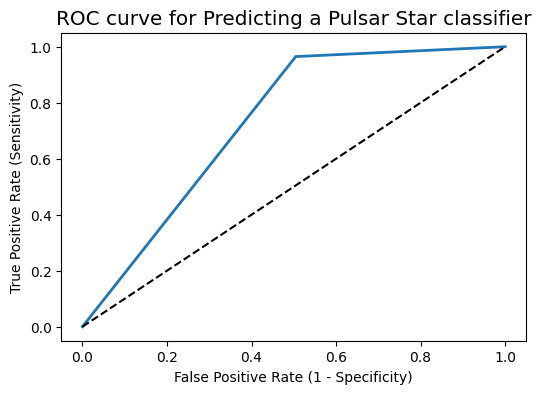

In [44]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting the Steam Reviews')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()


ROC curve help us to choose a threshold level that balances sensitivity and specificity for a particular context.

### ROC  AUC


**ROC AUC** stands for **Receiver Operating Characteristic - Area Under Curve**. It is a technique to compare classifier performance. In this technique, we measure the `area under the curve (AUC)`. A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5. 


So, **ROC AUC** is the percentage of the ROC plot that is underneath the curve.

In [45]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.7301


### Comments


- ROC AUC is a single number summary of classifier performance. The higher the value, the better the classifier.

- ROC AUC of our model approaches towards 1 (0.7301). So, we can conclude that our classifier does a good job in classifying the Steam Reviews.

In [50]:
import pickle

In [1]:
pickl = {'vectorizer': cv,
         'model': svc
         }
pickle.dump(pickl, open('GGmodels'+".p", "wb"))


NameError: name 'cv' is not defined